In [1]:
from colomoto import minibn

In [2]:
bn = minibn.BooleanNetwork({
"GATA2": "GATA2 & (~(GATA1&FOG1)) & (~PU1)",
"GATA1": "(GATA1 | GATA2 | Fli1) & (~PU1)",
"FOG1": "GATA1",
"EKLF": "GATA1 & (~Fli1)",
"Fli1": "GATA1 & (~EKLF)",
"SCL": "GATA1 & (~PU1)",
"CEBPA": "CEBPA&(~(GATA1 &FOG1 &SCL))",
"PU1": "(CEBPA| PU1) & (~(GATA1 | GATA2))",
"cJun": "PU1 & (~Gfi1)",
"EgrNab": "(PU1 &cJun) & (~Gfi1)",
"Gfi1": "CEBPA&(~EgrNab)",
})
bn

CEBPA <- CEBPA&(!(GATA1&FOG1&SCL))
EKLF <- GATA1&!Fli1
EgrNab <- (PU1&cJun)&!Gfi1
FOG1 <- GATA1
Fli1 <- GATA1&!EKLF
GATA1 <- (GATA1|GATA2|Fli1)&!PU1
GATA2 <- GATA2&(!(GATA1&FOG1))&!PU1
Gfi1 <- CEBPA&!EgrNab
PU1 <- (CEBPA|PU1)&(!(GATA1|GATA2))
SCL <- GATA1&!PU1
cJun <- PU1&!Gfi1

# computing graph layout...


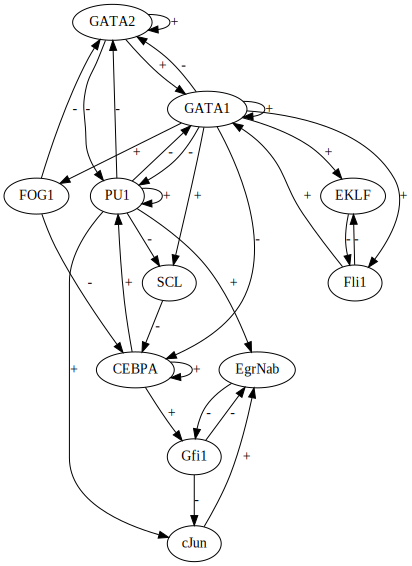

In [3]:
bn.influence_graph()

In [4]:
from colomoto_jupyter import tabulate

In [5]:
from IPython.display import display, Markdown
import itertools

In [6]:
import cabean

In [7]:
a = cabean.attractors(bn)
tabulate(a)

<table>
<thead>
<tr><th style="text-align: right;">  </th><th style="text-align: right;">  CEBPA</th><th style="text-align: right;">  EKLF</th><th style="text-align: right;">  EgrNab</th><th style="text-align: right;">  FOG1</th><th style="text-align: right;">  Fli1</th><th style="text-align: right;">  GATA1</th><th style="text-align: right;">  GATA2</th><th style="text-align: right;">  Gfi1</th><th style="text-align: right;">  PU1</th><th style="text-align: right;">  SCL</th><th style="text-align: right;">  cJun</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;"> 0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       1</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">     1</td></tr>
<tr><td style="text-align: right;"> 1</td><td style="text-align: right;">      1</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td></tr>
<tr><td style="text-align: right;"> 2</td><td style="text-align: right;">      1</td><td style="text-align: right;">     0</td><td style="text-align: right;">       1</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">     1</td></tr>
<tr><td style="text-align: right;"> 3</td><td style="text-align: right;">      0</td><td style="text-align: right;">     1</td><td style="text-align: right;">       0</td><td style="text-align: right;">     1</td><td style="text-align: right;">     0</td><td style="text-align: right;">      1</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">     0</td></tr>
<tr><td style="text-align: right;"> 4</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">     0</td></tr>
<tr><td style="text-align: right;"> 5</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td></tr>
</tbody>
</table>

In [8]:
init = {"Fli1": 1}
dest = {"Gfi1": 1}

In [9]:
r1 = cabean.OneStepReprogramming(bn)
k = len(a)
for i in range(k):
    for j in range(k):
        if i == j: continue
        display(Markdown("### {} -> {}".format(i,j)))
        display(r1.attractor_to_attractor(a[i], a[j]).as_table())

### 0 -> 1

,CEBPA,EgrNab,Gfi1
0,1,0,1


### 0 -> 2

,CEBPA
0,1


### 0 -> 3

,EKLF,GATA1,PU1
0,1,1,0


### 0 -> 4

,Fli1,GATA1,PU1
0,1,1,0


### 0 -> 5

,PU1
0,0


### 1 -> 0

,CEBPA
0,0


### 1 -> 2

,EgrNab,Gfi1,cJun
0,1,0,1


### 1 -> 3

,EKLF,GATA1,PU1
0,1,1,0


### 1 -> 4

,Fli1,GATA1,PU1
0,1,1,0


### 1 -> 5

,CEBPA,PU1
0,0,0


### 2 -> 0

,CEBPA
0,0


### 2 -> 1

,EgrNab,Gfi1
0,0,1


### 2 -> 3

,EKLF,GATA1,PU1
0,1,1,0


### 2 -> 4

,Fli1,GATA1,PU1
0,1,1,0


### 2 -> 5

,CEBPA,PU1
0,0,0


### 3 -> 0

,GATA1,PU1
0,0,1


### 3 -> 1

,CEBPA,GATA1,Gfi1
0,1,0,1


### 3 -> 2

,CEBPA,EgrNab,GATA1,PU1,cJun
0,1,1,0,1,1


### 3 -> 4

,EKLF,Fli1
0,0,1


### 3 -> 5

,GATA1
0,0


### 4 -> 0

,GATA1,PU1
0,0,1


### 4 -> 1

,CEBPA,Fli1,GATA1,Gfi1,PU1
0,1,0,0,1,
1,1,,0,1,1


### 4 -> 2

,CEBPA,EgrNab,GATA1,PU1,cJun
0,1,1,0,1,1


### 4 -> 3

,EKLF,Fli1
0,1,0


### 4 -> 5

,Fli1,GATA1
0,0,0


### 5 -> 0

,PU1
0,1


### 5 -> 1

,CEBPA,Gfi1
0,1,1


### 5 -> 2

,CEBPA,EgrNab,PU1,cJun
0,1,1,1,1


### 5 -> 3

,EKLF,GATA1
0,1,1


### 5 -> 4

,Fli1,GATA1
0,1,1


In [10]:
r1.attractor_to_attractor(a[2], a[0], exclude={"CEBPA"}).as_table()